# Tutorial Plot Data - 02

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from mylib import Style

In [2]:
warna = {
    "S1": "#1F77B4",
    "S2": "#FF7F0F",
    "S3": "#2BA02B",
    "S4": "#D62727",
    "S5": "#9467BD",
    "S6": "#8C564C",
    "S7": "#E377C3",
    "S8": "#7F7F7F",
    "S9": "#BCBD21",
    "S10": "#15BECF",
    "Temp": "#187498",
    "Humid": "#EB5353",
}

In [3]:
data = pd.read_csv("../data/data-gain.csv")
data.head()

,Unnamed: 0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Temp,Humid,Label
0,0,1137.500,954.500,279.125,1134.625,413.375,259.375,136.750,1471.250,687.000,735.375,41.35,40.07,1
1,1,1265.375,1267.750,239.375,1263.625,409.875,235.500,99.000,1204.125,740.750,666.375,40.81,39.82,1
2,2,776.000,800.000,562.750,727.500,445.375,267.375,168.875,729.750,339.375,349.500,41.72,37.00,1
3,3,792.750,1150.625,133.500,811.875,288.250,205.125,125.250,1181.250,470.375,658.250,40.63,39.04,1
4,4,1448.250,1244.250,553.875,1426.500,586.500,334.750,172.500,1552.250,883.375,823.375,41.58,37.19,1


In [4]:
data.drop(columns=list(data)[0], inplace=True)
data.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Temp,Humid,Label
0,1137.500,954.500,279.125,1134.625,413.375,259.375,136.750,1471.250,687.000,735.375,41.35,40.07,1
1,1265.375,1267.750,239.375,1263.625,409.875,235.500,99.000,1204.125,740.750,666.375,40.81,39.82,1
2,776.000,800.000,562.750,727.500,445.375,267.375,168.875,729.750,339.375,349.500,41.72,37.00,1
3,792.750,1150.625,133.500,811.875,288.250,205.125,125.250,1181.250,470.375,658.250,40.63,39.04,1
4,1448.250,1244.250,553.875,1426.500,586.500,334.750,172.500,1552.250,883.375,823.375,41.58,37.19,1


Text(0, 0.5, 'Maximum voltage gain (V)')

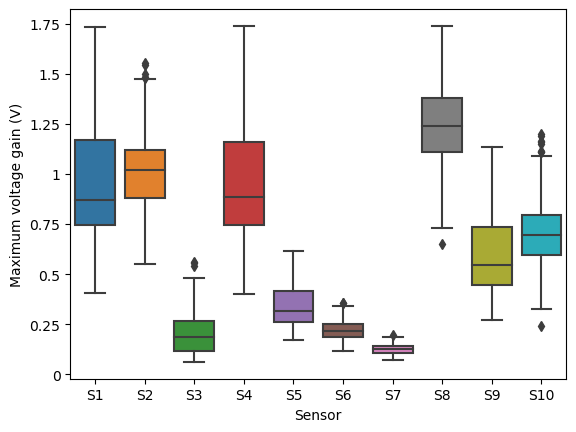

In [5]:
data_melt = pd.melt(data, id_vars="Label", value_vars=list(data)[:-3])

# fig, ax = Style().update()
ax = sns.boxplot(data=data_melt, x="variable", y="value", palette=list(warna.values()))
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / 1000.0))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_xlabel("Sensor")
ax.set_ylabel("Maximum voltage gain (V)")

In [6]:
Style().update()

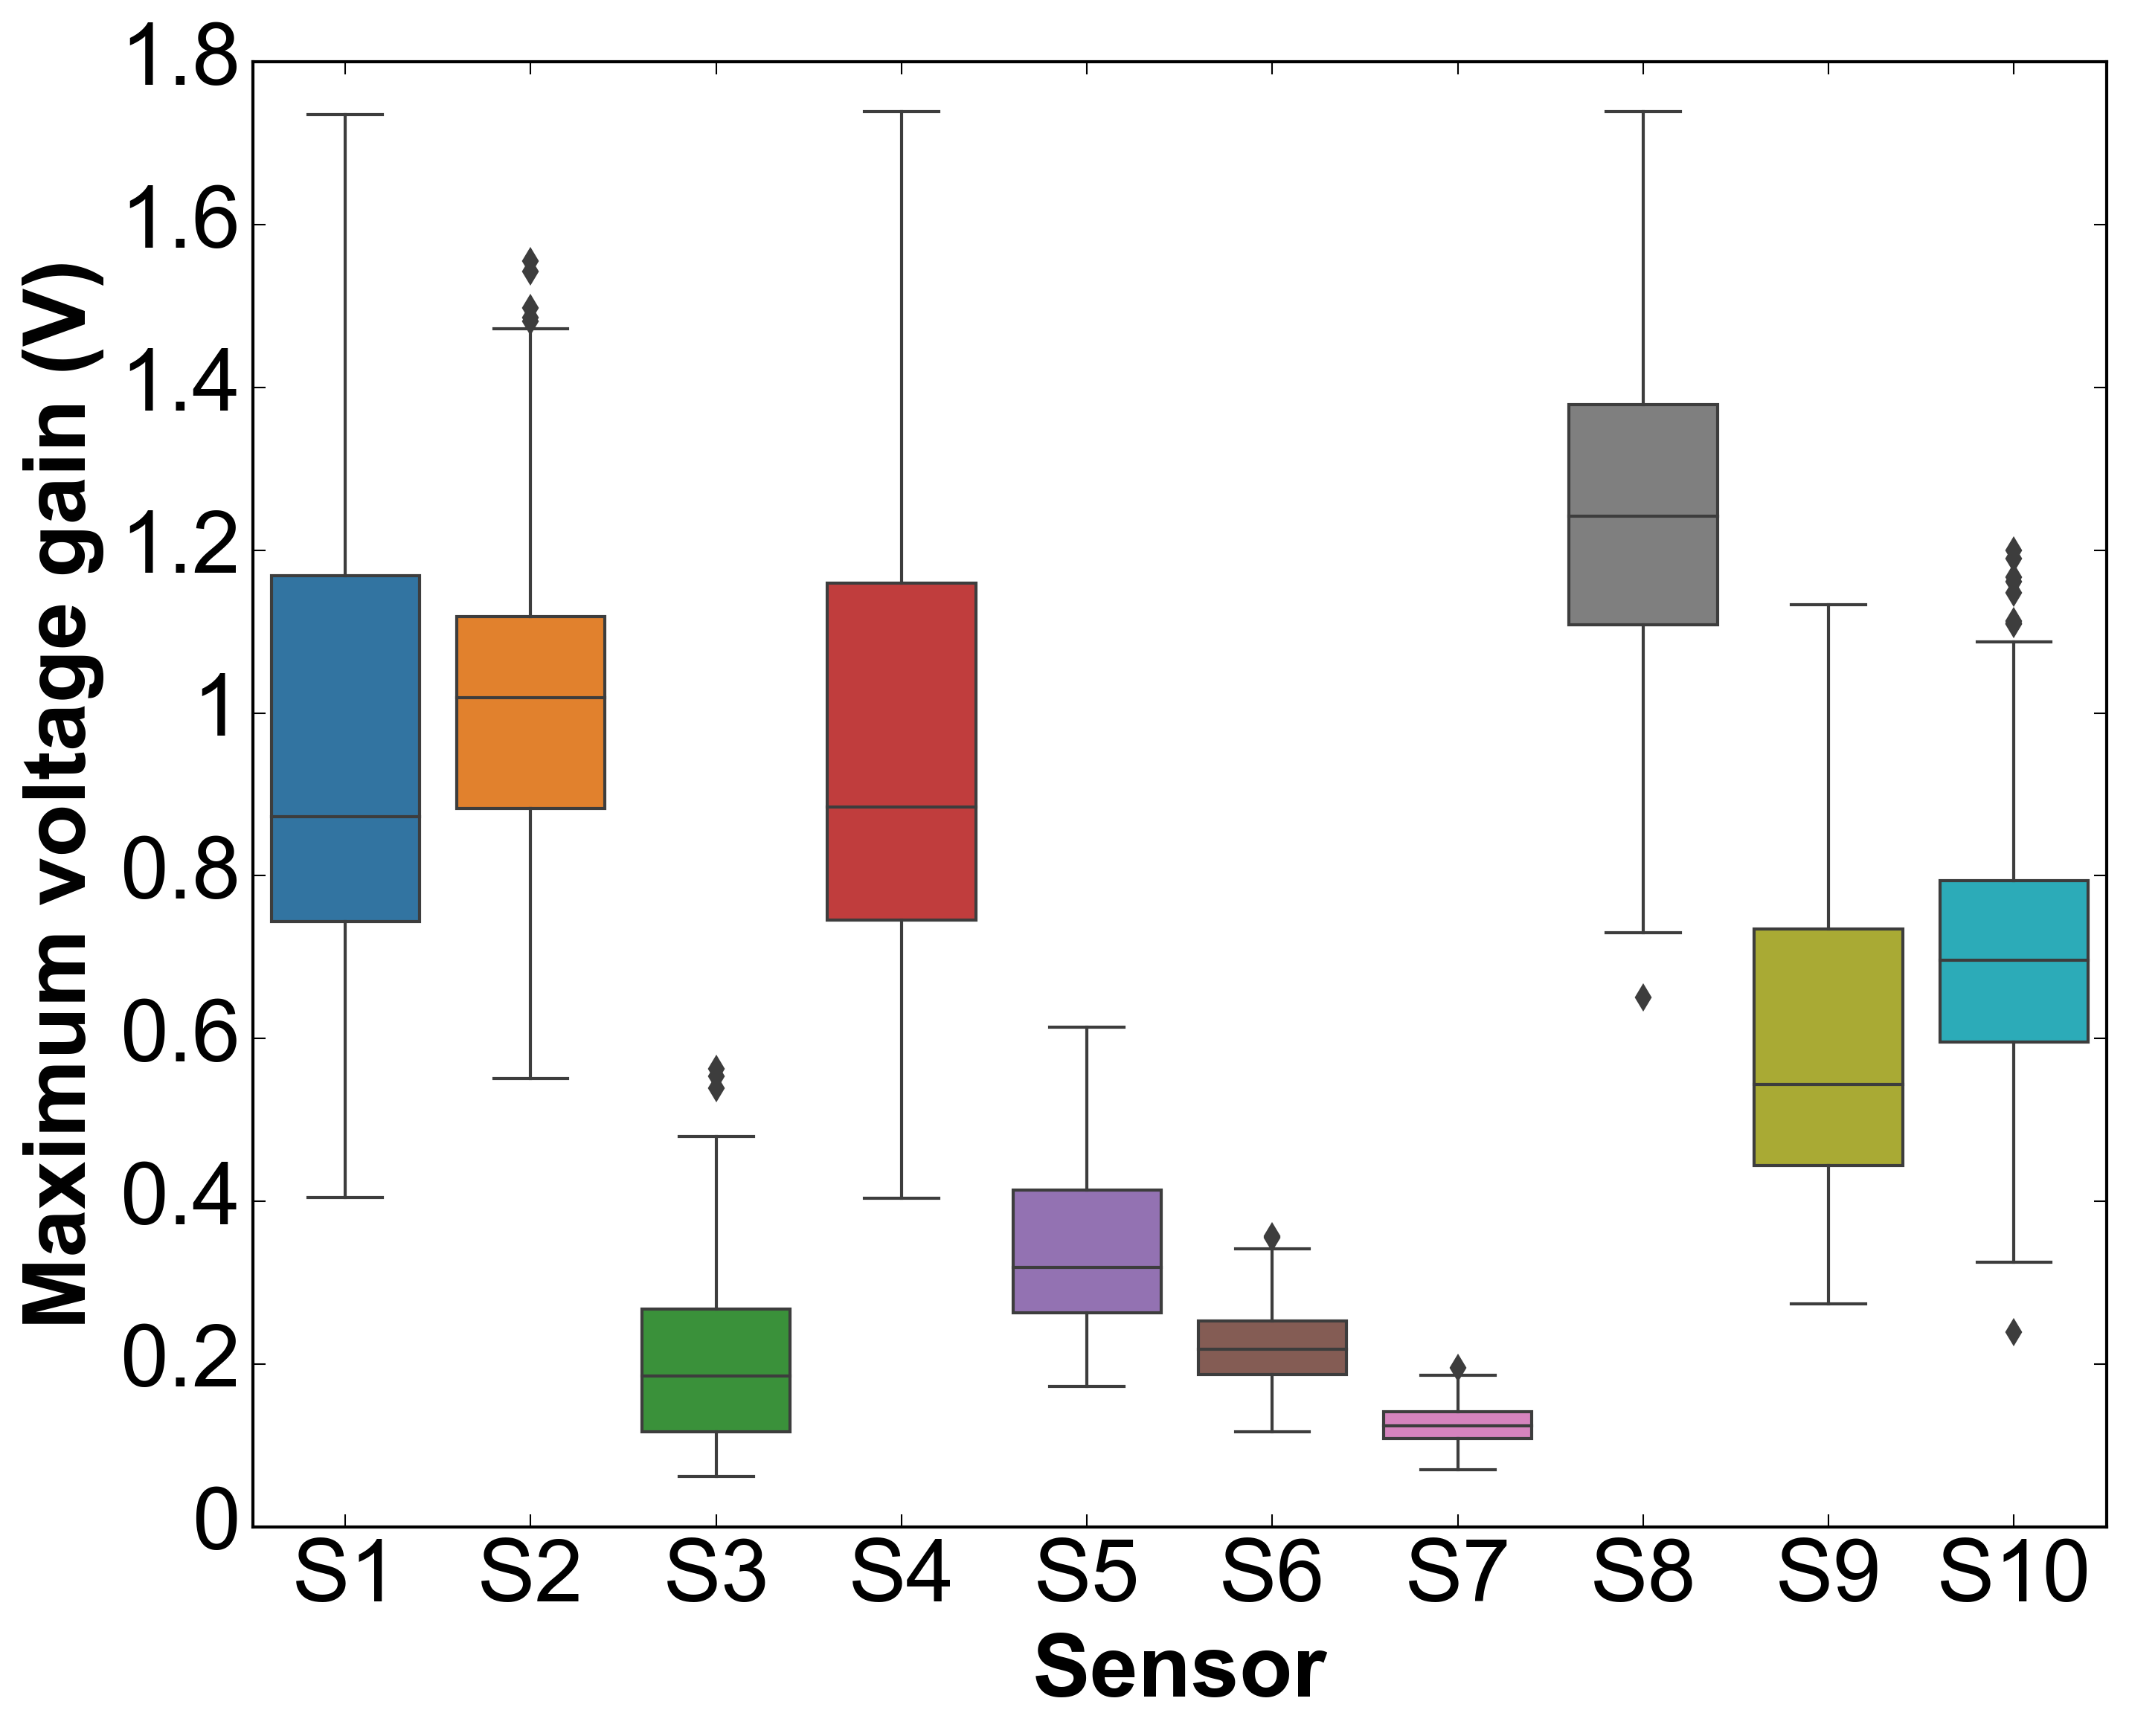

In [7]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])
ax = sns.boxplot(data=data_melt, x="variable", y="value", palette=list(warna.values()))
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / 1000.0))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_xlabel("Sensor")
ax.set_ylabel("Maximum voltage gain (V)")
fig.patch.set_facecolor("xkcd:white")

In [8]:
# save ke SVG
fig.savefig("../reports/figures/02_boxplot.svg")

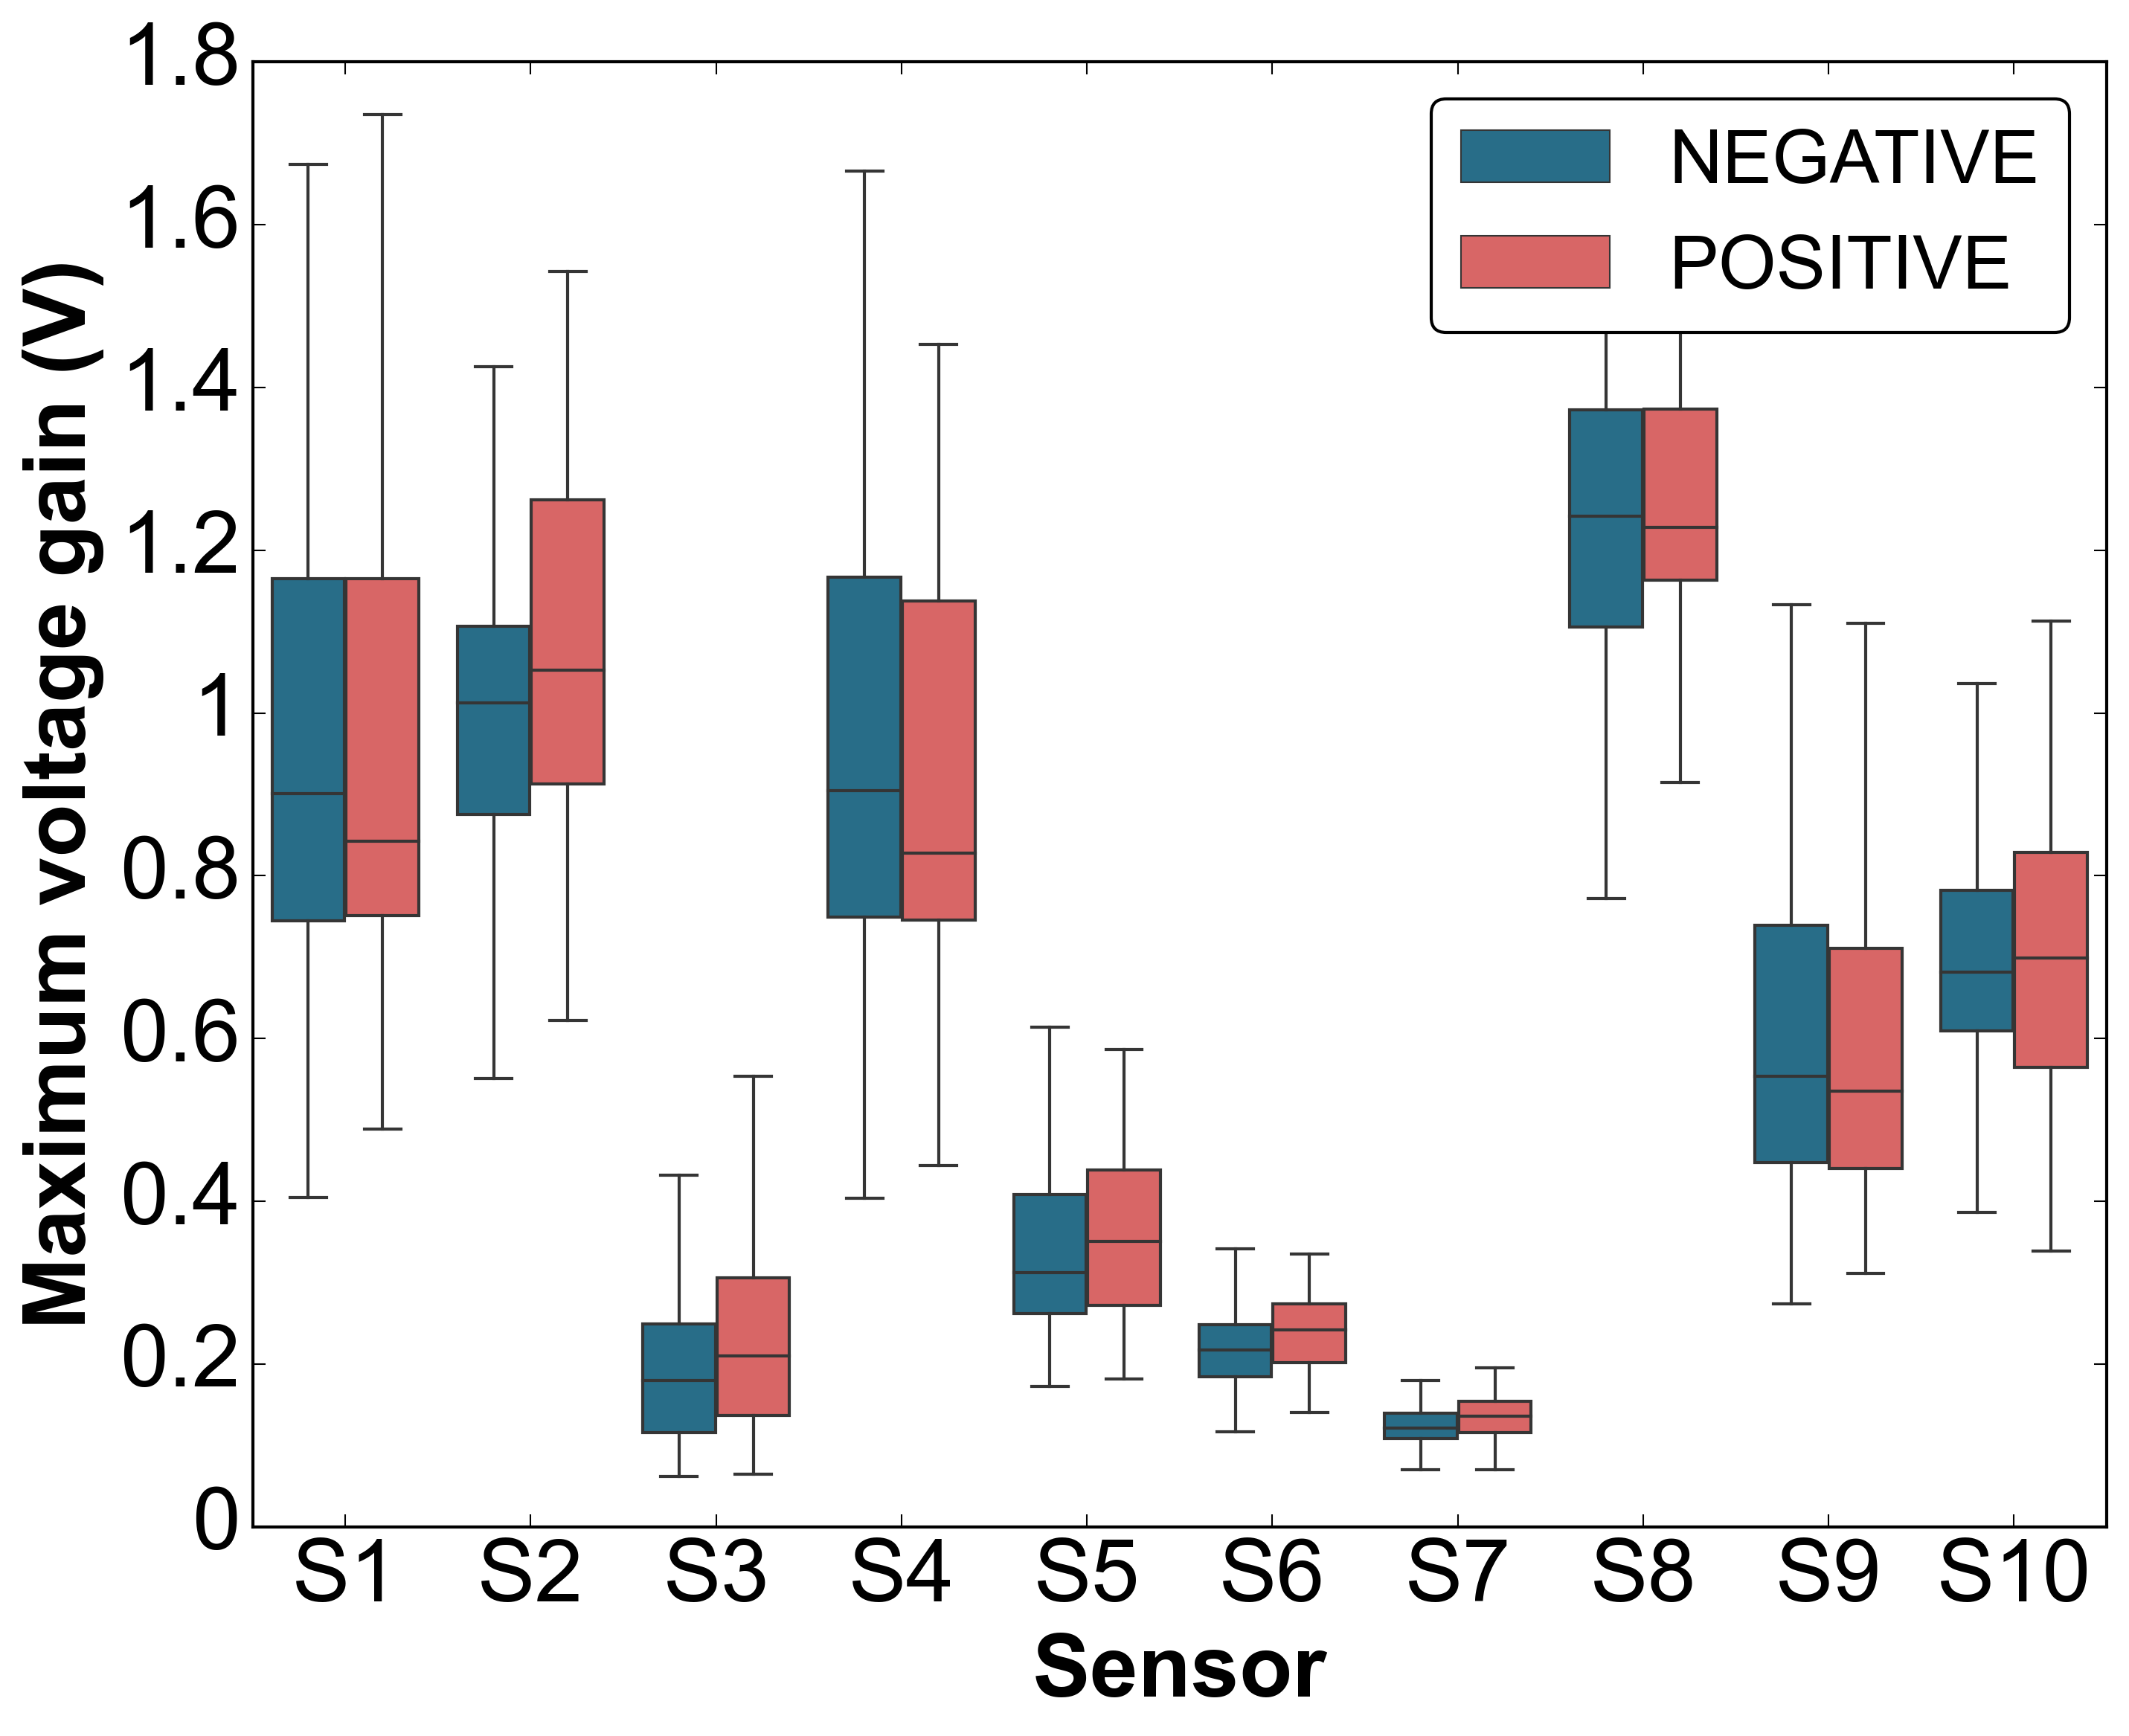

In [13]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])
ax = sns.boxplot(
    data=data_melt,
    x="variable",
    y="value",
    hue="Label",
    # hue_order="label",
    showfliers=False,
    palette=["#187498", "#EB5353"],
)

ax.set_xlabel("Sensor")
ax.set_ylabel("Maximum voltage gain (V)")
L = ax.legend(loc=1)
ax.legend_.set_title(None)
L.get_texts()[0].set_text("NEGATIVE")
L.get_texts()[1].set_text("POSITIVE")
# plt.xticks(rotation=90)
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / 1000.0))
ax.yaxis.set_major_formatter(ticks_y)
fig.patch.set_facecolor("xkcd:white")

# save ke SVG
fig.savefig("../reports/figures/02_boxplot-PN.svg")